In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file = r"../dados/Petroleo cru - WTI e Brent e derivados_data-diario_EIA - Original.xls"

In [6]:
excel_file = pd.ExcelFile(file)

In [14]:
pd.read_excel(excel_file, sheet_name="Data 7", header=2, index_col=0).shape

(7853, 1)

In [22]:
# read data into single dataframe
df = pd.DataFrame()
df["crude_oil"] = pd.read_excel(excel_file, sheet_name="Data 1", header=2, index_col=0).iloc[:, 0] / 42
df["conventional_gas"] = pd.read_excel(excel_file, sheet_name="Data 2", header=2, index_col=0).iloc[:, 0]
df["conventional_gas2"] = pd.read_excel(excel_file, sheet_name="Data 2", header=2, index_col=0).iloc[:, 1]
df["rbob_regular_gas"] = pd.read_excel(excel_file, sheet_name="Data 3", header=2, index_col=0).iloc[:, 0]
df["heating_oil"] = pd.read_excel(excel_file, sheet_name="Data 4", header=2, index_col=0).iloc[:, 0]
df["diesel_fuel"] = pd.read_excel(excel_file, sheet_name="Data 5", header=2, index_col=0).iloc[:, 0]
df["diesel_fuel2"] = pd.read_excel(excel_file, sheet_name="Data 5", header=2, index_col=0).iloc[:, 1]
df["diesel_fuel3"] = pd.read_excel(excel_file, sheet_name="Data 5", header=2, index_col=0).iloc[:, 2]
df["jet_fuel"] = pd.read_excel(excel_file, sheet_name="Data 6", header=2, index_col=0).iloc[:, 0]
df["propane"] = pd.read_excel(excel_file, sheet_name="Data 7", header=2, index_col=0).iloc[:, 0]

In [23]:
df.isna().mean().sort_values().head(6)

crude_oil            0.015903
conventional_gas     0.028914
heating_oil          0.029120
conventional_gas2    0.029223
jet_fuel             0.128769
propane              0.189178
dtype: float64

In [18]:
# aggregate monthly
df["month_date"] = pd.Series(df.index).apply(lambda dt: dt.replace(day=1)).values
month_df = df.groupby("month_date").mean()
month_df.dropna(inplace=True)
month_df.shape

(209, 10)

In [19]:
# first and last month
month_df.index[[0, -1]]

DatetimeIndex(['2006-06-01', '2023-10-01'], dtype='datetime64[ns]', name='month_date', freq=None)

In [20]:
# validation that we have all months between first and last
(month_df.index == pd.date_range(month_df.index[0], month_df.index[-1], freq="MS")).mean()

1.0

In [24]:
# compute spreads (monthly)
# TODO: aplicar log
month_df["spread1"] = np.log(month_df["conventional_gas"] / month_df["crude_oil"])
month_df["spread2"] = np.log(month_df["heating_oil"] / month_df["crude_oil"])
month_df["spread3"] = np.log(month_df["conventional_gas2"] / month_df["crude_oil"])
month_df["spread4"] = np.log(month_df["jet_fuel"] / month_df["crude_oil"])

<Axes: xlabel='month_date'>

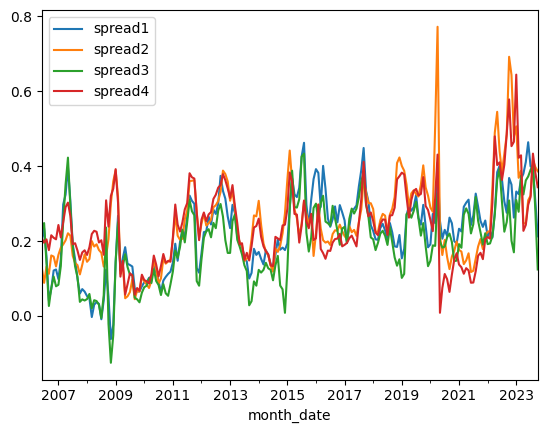

In [25]:
# plot spreads
month_df[["spread1", "spread2", "spread3", "spread4"]].dropna().plot()

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

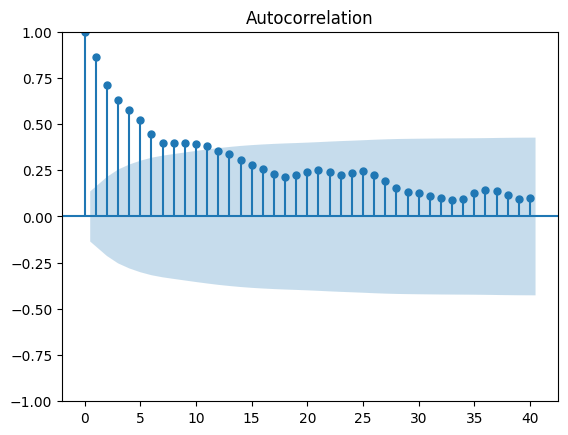

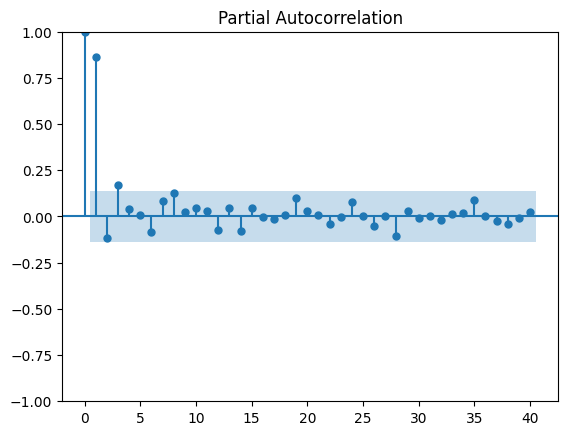

In [27]:
plot_acf( month_df.spread1.dropna(), lags=40);
plot_pacf(month_df.spread1.dropna(), lags=40);

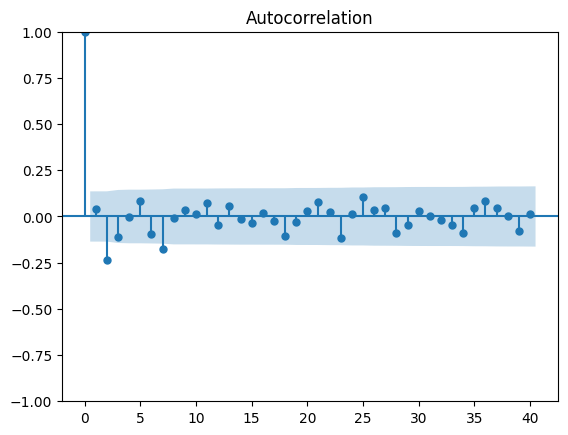

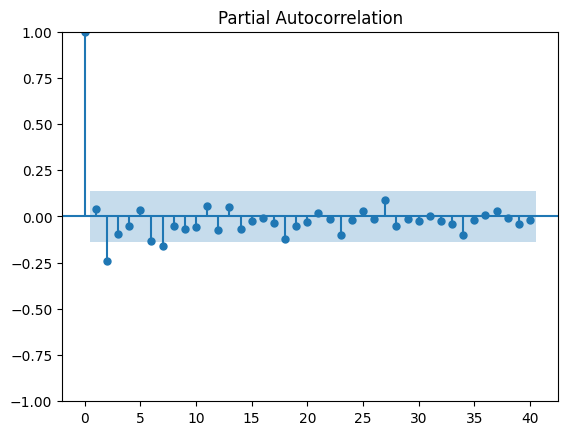

In [28]:
plot_acf( month_df.spread1.diff().dropna(), lags=40);
plot_pacf(month_df.spread1.diff().dropna(), lags=40);

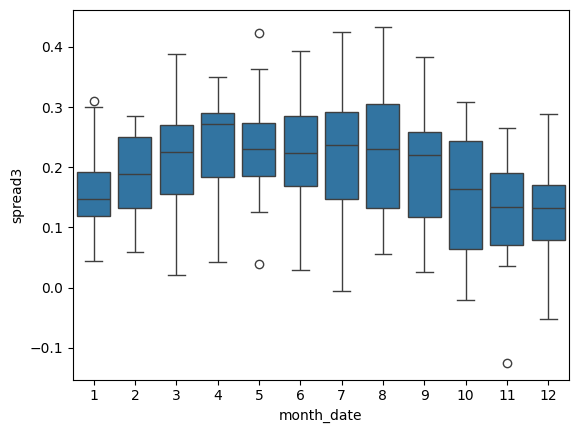

In [29]:
sns.boxplot(x=month_df.index.month, y=month_df.spread3);

In [32]:
month_df.to_csv(r"..//dados//monthly_data.csv")